## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset** [datarium package], which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [1]:
#Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats

In [2]:
url = "https://github.com/scicloj/datarium-CSV/raw/main/data/headache.csv.gz"
df = pd.read_csv(url, compression='gzip')

print(df.tail())
print(df.info())

    id  gender  risk treatment  pain_score
67  68  female  high         Z   82.786300
68  69  female  high         Z   81.265636
69  70  female  high         Z   80.419553
70  71  female  high         Z   87.142265
71  72  female  high         Z   79.609041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          72 non-null     int64  
 1   gender      72 non-null     object 
 2   risk        72 non-null     object 
 3   treatment   72 non-null     object 
 4   pain_score  72 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.9+ KB
None



### Descriptive statistics





### Assumptions


#### Outliers




#### Normality




#### Homogeneity of variance




### Anova





### Post-hoc tests

If there is a significant 3-way interaction effect, you can decompose it into:

-    Simple two-way interaction: run two-way interaction at each level of third variable,
-    Simple simple main effect: run one-way model at each level of second variable,
-    Simple simple pairwise comparisons: run pairwise or other post-hoc comparisons if necessary.

If you do not have a statistically significant three-way interaction, you need to determine whether you have any statistically significant two-way interaction from the ANOVA output. You can follow up a significant two-way interaction by simple main effects analyses and pairwise comparisons between groups if necessary.

#### Two-way interactions




#### Main effects



#### Pairwise comparisons

### Descriptive statistics

                            mean       std  count
gender risk treatment                            
female high X          78.865059  5.316489      6
            Y          81.175304  4.619387      6
            Z          81.035142  3.984886      6
       low  X          74.156231  3.690272      6
            Y          68.361925  4.081842      6
            Z          69.779555  2.719645      6
male   high X          92.738847  5.116095      6
            Y          82.341542  5.000898      6
            Z          79.680736  4.045885      6
       low  X          76.051783  3.854876      6
            Y          73.138772  4.765061      6
            Z          74.455863  4.888865      6


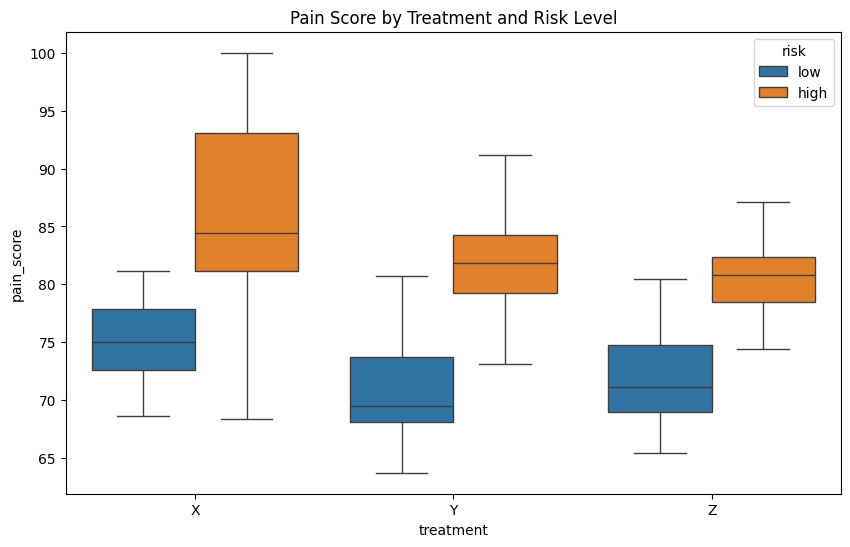

In [3]:
desc_stats = df.groupby(['gender','risk', 'treatment'])['pain_score'].agg(['mean', 'std', 'count'])
print(desc_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='pain_score', hue='risk', data=df)
plt.title('Pain Score by Treatment and Risk Level')
plt.show()

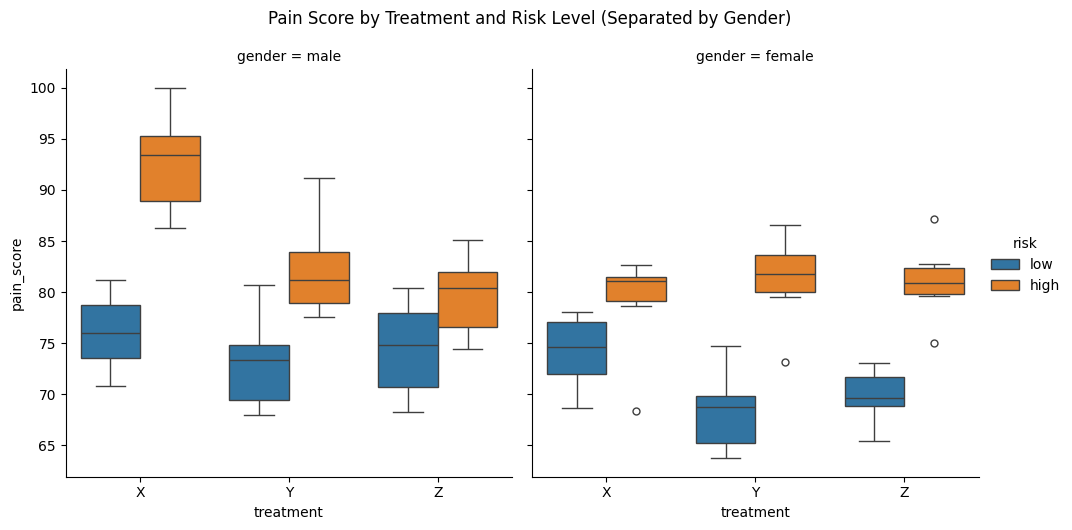

In [5]:
# Visualisation with gender
g = sns.catplot(
    x="treatment", 
    y="pain_score", 
    hue="risk", 
    col="gender", 
    data=df, 
    kind="box",
    height=5, 
    aspect=1
)

g.fig.suptitle('Pain Score by Treatment and Risk Level (Separated by Gender)', y=1.05)
plt.show()

Pain Score Observations:

- Highest Average Pain: The highest mean pain score (92.74) in Males with High Risk receiving Treatment X.

- Lowest Average Pain: The lowest mean pain score (68.36) in Females with Low Risk receiving Treatment Y.

Gender and Risk Comparisons:

- Females (High Risk): Pain scores were relatively similar across treatments, ranging from approximately 78.87 (Treatment X) to 81.18 (Treatment Y).

- Females (Low Risk): Treatment Y showed the lowest pain score (68.36), while Treatment X was the highest in this group (74.16).

- Males (High Risk): There was a notable difference in pain scores for Treatment X (92.74) compared to Treatments Y (82.34) and Z (79.68).

- Males (Low Risk): Scores were consistent, ranging from 73.14 (Treatment Y) to 76.05 (Treatment X).

### Assumptions
#### Outliers

In [6]:
def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    outliers = group[(group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))]
    return outliers

outliers = df.groupby(['gender', 'risk', 'treatment'])['pain_score'].apply(find_outliers)
print(outliers)

gender  risk  treatment    
female  high  X          56    68.360185
              Y          61    73.144392
              Z          66    74.988057
                         70    87.142265
Name: pain_score, dtype: float64


##### Key Findings:

- Most of them are appearing in the Female / High Risk category:

  - Treatment X: One outlier was found with a pain score of approximately 68.36.

  - Treatment Y: One outlier was found with a score of 73.14.

  - Treatment Z: Two outliers were identified with scores of 74.99 and 87.14.

It appears that the High Risk Female group has the most variability, containing all the flagged extreme values in this dataset.

#### Normality


In [ ]:
for name, group_data in df.groupby(['gender', 'risk', 'treatment']):
    stat, p_value = shapiro(group_data['pain_score'])
    
    print(f"Group: {name}")
    print(f"p-value: {p_value:.5f}")
    
    if p_value > 0.05:
        print("The distribution is normal.")
    else:
        print("The distribution is NOT normal.")
    
    print("-" * 40)


Group: ('female', 'high', 'X')
p-value: 0.00869
The distribution is NOT normal.
----------------------------------------
Group: ('female', 'high', 'Y')
p-value: 0.65382
The distribution is normal.
----------------------------------------
Group: ('female', 'high', 'Z')
p-value: 0.90060
The distribution is normal.
----------------------------------------
Group: ('female', 'low', 'X')
p-value: 0.59994
The distribution is normal.
----------------------------------------
Group: ('female', 'low', 'Y')
p-value: 0.55543
The distribution is normal.
----------------------------------------
Group: ('female', 'low', 'Z')
p-value: 0.80095
The distribution is normal.
----------------------------------------
Group: ('male', 'high', 'X')
p-value: 0.80760
The distribution is normal.
----------------------------------------
Group: ('male', 'high', 'Y')
p-value: 0.38426
The distribution is normal.
----------------------------------------
Group: ('male', 'high', 'Z')
p-value: 0.78430
The distribution is n

<Figure size 800x600 with 0 Axes>

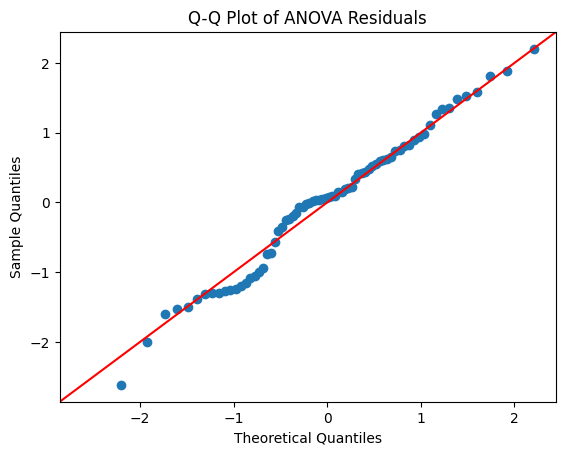

In [ ]:
# QQ plot
group_means = df.groupby(['gender', 'risk', 'treatment'])['pain_score'].transform('mean')
residuals = df['pain_score'] - group_means

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of ANOVA Residuals')
plt.show()


##### Conclusions:
- Most groups meet the requirement. 
- Expect the group female with high risk and X treatment.
 <br> In the plot above: <br>
- Since the points lie approximately on the diagonal line for both genders and all treatment groups, we can conclude that the residuals are normally distributed. 
- This means the normality assumption for the 3-way ANOVA is met.

#### Homogeneity of variance
Test Levene'a


In [8]:
groups_list = [group['pain_score'].values for name,group in df.groupby(['gender', 'risk', 'treatment'])]
stat, p_value = levene(*groups_list)

print(f"Statystyka testu: {stat:.4f}")
print(f"p-value: {p_value:.5f}")

if p_value > 0.05:
    print("It is homogeneous.")
else:
    print("It is NOT homogeneous.")

Statystyka testu: 0.1786
p-value: 0.99821
It is homogeneous.


##### Conclusions:
- p-value (0.998) is greater than significance level of 0.05. 
- Thismeans we fail to reject the null hypothesis.
- Therefore, the assumptions of homogeneity is met.
- This means the normality assumption for the 3-way ANOVA is met.

### ANOVA

In [9]:
model = ols('pain_score ~ C(gender) * C(risk) * C(treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

                                      sum_sq    df            F        PR(>F)
Intercept                       37318.184764   1.0  1928.766332  2.538132e-47
C(gender)                         577.446016   1.0    29.844925  9.483691e-07
C(risk)                            66.519182   1.0     3.438001  6.862955e-02
C(treatment)                       20.132278   2.0     0.520262  5.970215e-01
C(gender):C(risk)                 215.217212   1.0    11.123363  1.466050e-03
C(gender):C(treatment)            399.733382   2.0    10.329981  1.395716e-04
C(risk):C(treatment)              110.970499   2.0     2.867719  6.464732e-02
C(gender):C(risk):C(treatment)    286.595625   2.0     7.406255  1.334476e-03
Residual                         1160.892871  60.0          NaN           NaN


### Post-hoc tests

In [ ]:
df['combined_group'] = df['gender'] + "_" + df['risk'] + "_" + df['treatment']
tukey_interaction = pairwise_tukeyhsd(endog=df['pain_score'], 
                                      groups=df['combined_group'], 
                                      alpha=0.05)

print(tukey_interaction)




--- Solutions of Tukeya HSD ---
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
female_high_X female_high_Y   2.3102 0.9988  -6.3246   10.945  False
female_high_X female_high_Z   2.1701 0.9993  -6.4647  10.8049  False
female_high_X  female_low_X  -4.7088 0.7814 -13.3436    3.926  False
female_high_X  female_low_Y -10.5031 0.0058 -19.1379  -1.8683   True
female_high_X  female_low_Z  -9.0855 0.0308 -17.7203  -0.4507   True
female_high_X   male_high_X  13.8738 0.0001    5.239  22.5086   True
female_high_X   male_high_Y   3.4765 0.9651  -5.1583  12.1113  False
female_high_X   male_high_Z   0.8157    1.0  -7.8191   9.4505  False
female_high_X    male_low_X  -2.8133 0.9932 -11.4481   5.8215  False
female_high_X    male_low_Y  -5.7263 0.5185 -14.3611   2.9085  False
female_high_X    male_low_Z  -4.4092 0.8441  -13.044   4.2256  False
f

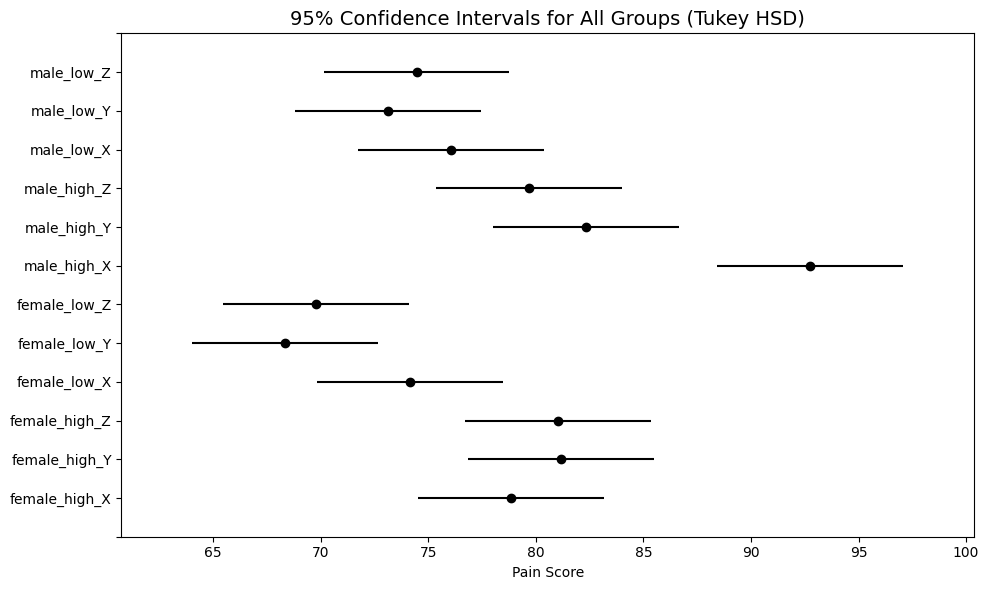

In [ ]:
tukey_interaction = pairwise_tukeyhsd(endog=df['pain_score'], 
                                      groups=df['combined_group'], 
                                      alpha=0.05)

fig = tukey_interaction.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD)", fontsize=14)
plt.xlabel("Pain Score")
plt.tight_layout()
plt.show()

##### Conclusion:
- High-Risk Males: Avoid Treatment X. It leads to significantly higher pain scores compared to Treatments Y and Z (p < 0.01).
- High-Risk Females: Treatment choice does not matter; X, Y, and Z show similar efficacy with no statistical difference.
- Risk Effect: As expected, high-risk patients consistently report higher pain levels than low-risk patients, regardless of the treatment used.

### Summary:
- The data suggests that Treatment X should be avoided for High-Risk Males due to significantly poorer outcomes. 
- However, for High-Risk Females, any of the three treatments yields statistically similar results. Treatments Y and Z appear to be the safer, more consistent choices across genders.